# Yelp Data Challenge - Clustering and PCA

BitTiger DS501

Nov 2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('data/last_3_years_restaurant_reviews.csv')

In [3]:
df.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"['Restaurants', 'American (Traditional)', 'Mex...",3.0,0,2015-06-26,0,4gH-5f0ewrH2Vvl0UYtQQA,1,I'm at training for work and went for a quick ...,0,GLGz9sSNHIbguwv90XStYA
1,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"['Restaurants', 'American (Traditional)', 'Mex...",3.0,2,2015-06-18,1,qlnMpBo8_GWhlJE6zR51qA,3,Given this location is close to my work I find...,2,YxqLJwDgcL4OoDB1hN-Ikg


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [3]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [4]:
# Make a column and take the values, save to a variable named "target"
df['perfect'] = df['stars']>4
target = df['perfect'].values

#### You may want to look at the statistic of the target variable

In [88]:
# To be implemented
target.mean()

0.45755661403717279

### Create training dataset and test dataset

In [8]:
from sklearn.model_selection import train_test_split

In [90]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
X_train, X_valid, y_train, y_valid = train_test_split(documents, target, test_size=0.3, random_state=42)

In [91]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((306266,), (131258,), (306266,), (131258,))

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

In [94]:
# Train the model with your training data
vector_train = vectorizer.fit_transform(x_train)

In [95]:
vector_train = vector_train.toarray()

In [23]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()
words

['00',
 '10',
 '100',
 '11',
 '12',
 '15',
 '16',
 '18',
 '20',
 '24',
 '25',
 '30',
 '40',
 '45',
 '50',
 '95',
 '99',
 'able',
 'absolutely',
 'accommodating',
 'actually',
 'add',
 'added',
 'affordable',
 'afternoon',
 'ago',
 'ahead',
 'amazing',
 'ambiance',
 'ambience',
 'american',
 'appetizer',
 'appetizers',
 'area',
 'aren',
 'arrived',
 'asada',
 'asian',
 'ask',
 'asked',
 'asking',
 'ate',
 'atmosphere',
 'attention',
 'attentive',
 'attitude',
 'authentic',
 'available',
 'average',
 'avocado',
 'avoid',
 'away',
 'awesome',
 'awful',
 'ayce',
 'bacon',
 'bad',
 'baked',
 'banana',
 'bar',
 'barely',
 'bartender',
 'bartenders',
 'based',
 'basic',
 'basically',
 'bbq',
 'bean',
 'beans',
 'beat',
 'beautiful',
 'beef',
 'beer',
 'beers',
 'believe',
 'bellagio',
 'belly',
 'benedict',
 'best',
 'better',
 'big',
 'birthday',
 'bit',
 'bite',
 'bites',
 'black',
 'bland',
 'blue',
 'boba',
 'bomb',
 'bone',
 'bottle',
 'bowl',
 'bowls',
 'box',
 'boy',
 'boyfriend',
 'br

In [96]:
# Use the trained model to transform all the reviews
document_vector = vectorizer.transform(documents)

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [24]:
# To be implemented
from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans.fit(vector_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [25]:
%%time

# To be implemented
assign_clusters = kmeans.predict(document_vector)

Wall time: 1.34 s


#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [28]:
# To be implemented
kmeans.cluster_centers_

array([[ 0.0028098 ,  0.00727997,  0.00139367, ...,  0.00165885,
         0.00228939,  0.00657263],
       [ 0.00088903,  0.00497977,  0.0018763 , ...,  0.00119468,
         0.00341372,  0.00673086],
       [ 0.0025619 ,  0.00857741,  0.00143653, ...,  0.00130349,
         0.00603006,  0.00943622],
       ..., 
       [ 0.00090741,  0.00396622,  0.0010776 , ...,  0.00101841,
         0.00241381,  0.00670081],
       [ 0.0032299 ,  0.00671102,  0.00230786, ...,  0.00144123,
         0.00390023,  0.00686196],
       [ 0.00173608,  0.0064264 ,  0.00240302, ...,  0.0010691 ,
         0.00326212,  0.00744918]])

In [29]:
kmeans.inertia_ 

283481.23276969278

#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [30]:
# To be implemented

n_feat = 10
cluster_centers = kmeans.cluster_centers_.argsort()[:, -1:-n_feat:-1]

In [31]:
cluster_centers

array([[638, 203, 364, 640, 370, 794, 143,  78, 448],
       [ 78, 328,  27, 640, 934, 501, 773, 223, 340],
       [148, 364, 338, 328, 718, 640, 597, 370, 476],
       [109, 342, 110, 364, 777, 143, 640, 328, 370],
       [328, 596, 773, 888, 539, 448, 123, 860, 232],
       [370, 328, 773, 640, 364, 340,  42,  52, 824],
       [364, 328, 640, 476, 692, 448, 773, 597, 564],
       [858, 727, 726, 640,  54, 370, 364, 336, 322]], dtype=int64)

In [33]:
for i, centroid in enumerate(cluster_centers):
    print("%d: %s" % (i, ", ".join(words[i] for i in centroid)))

0: pizza, crust, good, place, great, slice, cheese, best, just
1: best, food, amazing, place, vegas, love, service, delicious, friendly
2: chicken, good, fried, food, rice, place, ordered, great, like
3: burger, fries, burgers, good, shake, cheese, place, food, great
4: food, order, service, time, minutes, just, came, table, didn
5: great, food, service, place, good, friendly, atmosphere, awesome, staff
6: good, food, place, like, really, just, service, ordered, nice
7: sushi, rolls, roll, place, ayce, great, good, fresh, fish


#### Try different k
If you set k == to a different number, how does the top features change?

In [34]:
# To be implemented
# change k = 6
kmeans = KMeans(n_clusters=6)
kmeans.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
assign_clusters = kmeans.predict(document_vector)

n_feat = 10
cluster_centers = kmeans.cluster_centers_.argsort()[:, -1:-n_feat:-1]
for i, centroid in enumerate(cluster_centers):
    print("%d: %s" % (i, ", ".join(words[i] for i in centroid)))

0: pizza, crust, good, place, great, slice, cheese, best, just
1: food, order, service, time, just, minutes, like, came, didn
2: great, food, service, place, good, amazing, friendly, awesome, atmosphere
3: place, food, best, vegas, amazing, love, service, delicious, good
4: good, chicken, food, ordered, really, like, place, just, rice
5: burger, fries, burgers, good, shake, cheese, place, food, great


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [39]:
# To be implemented
# random select sample from each cluster, then display samples with rating

for i in range(kmeans.n_clusters):
    cluster = np.arange(0, document_vector.shape[0])[assign_clusters==i] # index of cluster
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print("=" * 10)
    print("Cluster %d:" % i)
    for review_index in sample_reviews:
        print("    %s - " % df.ix[review_index]['stars'],)
        print("%s" % df.ix[review_index]['text'])
    print

Cluster 0:
    5 - 
Delicious! 
Sat at the outside bar on a delightful Friday evening with beautiful weather. 

Started with the chicken Caesar. Portion size was perfect and the flavor of the Caesar was on point. 

Ordered a large pizza with garlic, spinach, green peppers and mushrooms. Great combination. Pizza was perfect. I really enjoyed it. 

Had the $10 dessert trio which was also delish. Comes with 3 desserts of your choice. We chose Oreo cheesecake, cannoli and tiramisu. Paired off with a lovely glass of red. 

Service was great, ambiance outside was relaxing and food was perfect. 
We will definitely return.
    2 - 
We got a flyer under our door at the Rio. Ordered pizza... took a hour and they called and said Rio wouldn't let them deliver to the room. Which I know is not true. The people across the hall had good delivered.  Had to go down and meet the driver.  Pizza was not in a warm carrier. Pizza was luke warm.  Asked for plates and red pepper.. we got no paper plates or red

E:\software\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [5]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
most_reviewed_restaurant = df['business_id'].value_counts().idxmax()
most_reviewed_restaurant

'RESDUcs7fIiihp38-d6_6g'

We can also load restaurant profile information from the business dataset (optional)

In [6]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)
df_top_restaurant = df[df['business_id'] == most_reviewed_restaurant].copy().reset_index()
df_top_restaurant.head(2)

,index,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,perfect
0,349300,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Food', 'Restaurants', 'Buffets', 'Breakfast ...",4.0,0,2015-09-03,0,izAo8yC9pWrYYx_UGHdbgA,5,You had me at DUMPLINGS. Mmmmm such a great bu...,0,OS_sHMLVIcF5JlZQzfYCKA,True
1,349301,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Food', 'Restaurants', 'Buffets', 'Breakfast ...",4.0,0,2016-03-29,0,yEILB4Esswy8yEZcikD4Hg,3,Not worth the price of admission! The wait is ...,0,82Micw6atbqgn8-r7oNRKg,False


### Vectorize the text feature

In [7]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values
documents_top_restaurant[:3]

array([ 'You had me at DUMPLINGS. Mmmmm such a great buffett, probably my new favorite in Las Vegas. Grand selection to choose from and high quality food. Worth the price and wait, I am coming back!',
       'Not worth the price of admission! The wait is terribly long! Over an hour just to pay $40 per person. There were no crab legs, lobster, or hot fish dishes. Minimal sushi choices and just about everything you could get at any other buffet for half the price! I will not be back here to eat mediocre food at an exquisite price tag!',
       'When it first opened, this place was beyond amazing with quality, food, service, and gourmet items. Throughout the years has gone down considerably, but has remained extremely overpriced for a buffet. As a positive the service and ambience was excellent.'], dtype=object)

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [8]:
# To be implemented
df_top_restaurant['favorable'] = (df_top_restaurant['stars'] > 4)
target_top_restaurant = df_top_restaurant['favorable'].values.astype(int)
target_top_restaurant

array([1, 0, 0, ..., 0, 1, 0])

#### Check the statistic of the target variable

In [9]:
# To be implemented
target_top_restaurant.mean()

0.37763652123663682

### Create training dataset and test dataset

In [11]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    documents_top_restaurant,
    target_top_restaurant, 
    test_size = 0.3,
    random_state = 42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2422,), (1039,), (2422,), (1039,))

### Get NLP representation of the documents

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

In [19]:
# Train the model with your training data
train_vector = vectorizer.fit_transform(X_train).toarray()

In [16]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()
words

['00',
 '10',
 '100',
 '11',
 '12',
 '15',
 '18',
 '20',
 '25',
 '30',
 '30pm',
 '39',
 '3pm',
 '40',
 '45',
 '50',
 '52',
 '54',
 '55',
 '57',
 '59',
 '60',
 '65',
 '70',
 '75',
 '80',
 '90',
 '99',
 'able',
 'absolutely',
 'actual',
 'actually',
 'add',
 'added',
 'additional',
 'afternoon',
 'ago',
 'agree',
 'ahead',
 'alaskan',
 'alcohol',
 'alright',
 'amazing',
 'ambiance',
 'american',
 'anymore',
 'appetite',
 'area',
 'aren',
 'aria',
 'arrive',
 'arrived',
 'asian',
 'ask',
 'asked',
 'asking',
 'assortment',
 'ate',
 'atmosphere',
 'attention',
 'attentive',
 'authentic',
 'available',
 'average',
 'avoid',
 'away',
 'awesome',
 'awful',
 'bacchanal',
 'bacon',
 'bad',
 'baked',
 'bar',
 'barely',
 'based',
 'basically',
 'bass',
 'bbq',
 'beautiful',
 'beef',
 'beer',
 'believe',
 'bellagio',
 'belly',
 'benedict',
 'best',
 'better',
 'big',
 'bigger',
 'biggest',
 'birthday',
 'bisque',
 'bit',
 'bite',
 'bites',
 'bland',
 'bloody',
 'boba',
 'boiled',
 'bomb',
 'bother

In [17]:
# Use the trained model to transform the test data
test_vector = vectorizer.transform(X_test).toarray()

In [18]:
# Use the trained model to transform all the data
documents_top_restaurant_vector = vectorizer.transform(documents_top_restaurant).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [69]:
# To be implemented
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(train_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [70]:
# To be implemented
assigned_cluster = kmeans.predict(documents_top_restaurant_vector)

#### Inspect the centroids

In [72]:
# To be implemented
print("cluster centers:")
print(kmeans.cluster_centers_.shape)

cluster centers:
(5, 1000)


#### Find the top 10 features for each cluster.

In [73]:
# To be implemented
n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-n_feat:-1]

print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top features for each cluster:
0: food, order, time, just, service, like, minutes, came, didn
1: burger, fries, burgers, good, shake, cheese, place, food, great
2: great, food, service, place, amazing, good, friendly, staff, awesome
3: pizza, crust, good, place, great, cheese, slice, best, just
4: good, place, food, chicken, best, vegas, delicious, like, really


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [75]:
# To be implemented
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, documents_top_restaurant_vector.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print ("=" * 10)
    print ("Cluster %d:" % i)
    for review_index in sample_reviews:
        print ("    %s - " % df_top_restaurant.ix[review_index]['stars'],)
        print ("%s" % df_top_restaurant.ix[review_index]['text'])
    print

Cluster 0:
    5 - 
A top notch classy buffet with so many selections it sends your head spinning.  This is one of my top two buffets in Vegas.  It is pricier than others, and the line to get in might be longer, but the food makes up for it.

I've been there twice for dinner.  Each time the table service of drinks was timely and the servers gave the impression they appreciated our patronage.  The only downside (having nothing to do with the buffet) is the horrible parking at Caesars.  Last time we were there it took nearly 45 minutes to find a parking spot and one has to be patient in self-parking.  The hotel has so much to offer that the existing parking structure is really too small.  I doubt that will change anytime soon.

The buffet features desserts galore.  I'm not a big dessert eater but my mouth was watering and I had to really test my resistance.
    2 - 
It's not that great.  You wait in a long line to get to the place where you pay for the buffet, then you wait a bunch more 

E:\software\anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [20]:
from sklearn.preprocessing import StandardScaler

# To be implemented
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_vector)
X_test_scaled = scaler.transform(test_vector)

### Use PCA to transform data (train and test) and get princial components

In [21]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

# To be implemented
n_col = 50
pca = PCA(n_components=n_col)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### See how much (and how much percentage of) variance the principal components explain

In [22]:
# To be implemented
pca.explained_variance_ 

array([ 8.96708997,  6.59845961,  4.42686693,  4.28829482,  3.83930759,
        3.55484251,  3.44440466,  3.28516105,  3.26505629,  3.12842457,
        3.08284847,  3.03780428,  2.96535929,  2.92652165,  2.90090413,
        2.84198775,  2.80700504,  2.77406602,  2.70262387,  2.68457518,
        2.67292268,  2.62445195,  2.61391208,  2.58987505,  2.55599594,
        2.55220657,  2.51594425,  2.5063108 ,  2.49697916,  2.48961067,
        2.4619652 ,  2.43347103,  2.42494209,  2.41433273,  2.39556861,
        2.38150348,  2.36252705,  2.34843961,  2.33168804,  2.32371646,
        2.29387138,  2.28212813,  2.25215749,  2.24634444,  2.23767864,
        2.22594108,  2.21575757,  2.20394871,  2.20250119,  2.18290149])

In [23]:
# To be implemented
pca.explained_variance_ratio_

array([ 0.00896339,  0.00659574,  0.00442504,  0.00428652,  0.00383772,
        0.00355337,  0.00344298,  0.0032838 ,  0.00326371,  0.00312713,
        0.00308158,  0.00303655,  0.00296413,  0.00292531,  0.00289971,
        0.00284081,  0.00280585,  0.00277292,  0.00270151,  0.00268347,
        0.00267182,  0.00262337,  0.00261283,  0.00258881,  0.00255494,
        0.00255115,  0.00251491,  0.00250528,  0.00249595,  0.00248858,
        0.00246095,  0.00243247,  0.00242394,  0.00241334,  0.00239458,
        0.00238052,  0.00236155,  0.00234747,  0.00233073,  0.00232276,
        0.00229292,  0.00228119,  0.00225123,  0.00224542,  0.00223675,
        0.00222502,  0.00221484,  0.00220304,  0.00220159,  0.002182  ])

### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

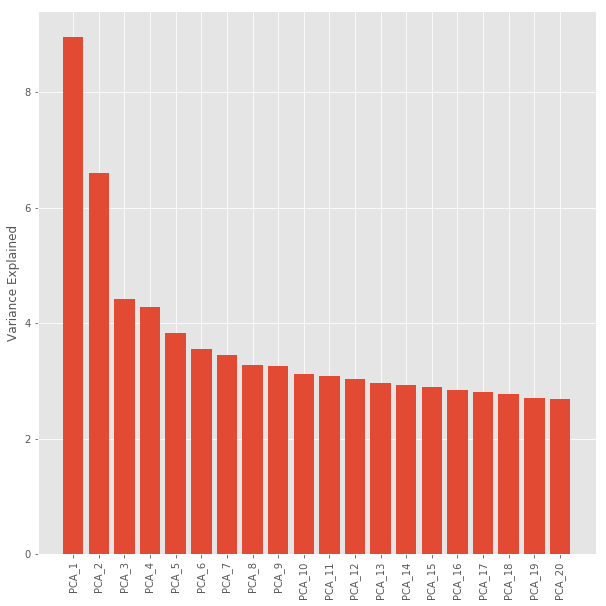

In [24]:
# To be implemented
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize=(10, 10))
plt.bar(pca_range,
        pca.explained_variance_[:n_col_to_display],
        align='center')
xticks = plt.xticks(pca_range,
                    pca_names,
                    rotation=90)
plt.ylabel('Variance Explained')
plt.show()

In [25]:
X_train_scaled.shape, y_train.shape

((2422, 1000), (2422,))

In [26]:
X_train_pca.shape, y_train.shape

((2422, 50), (2422,))

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [27]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

# To be implemented
model_lrc = LogisticRegression()

model_lrc.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
# Get score for training set
model_lrc.score(X_train_scaled, y_train)

0.99793559042113955

In [29]:
# Get score for test set
model_lrc.score(X_test_scaled, y_test)

0.68912415784408088

#### Use (Stardardized + PCA) tf-idf vectors as features

In [30]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

# To be implemented
model_lrc = LogisticRegression()

model_lrc.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
# Get score for training set
model_lrc.score(X_train_pca, y_train)

0.77993393889347651

In [34]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_lrc.score(X_test_pca, y_test)

0.78729547641963427

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: (insert your comments here)

#### You can plot the coefficients against principal components


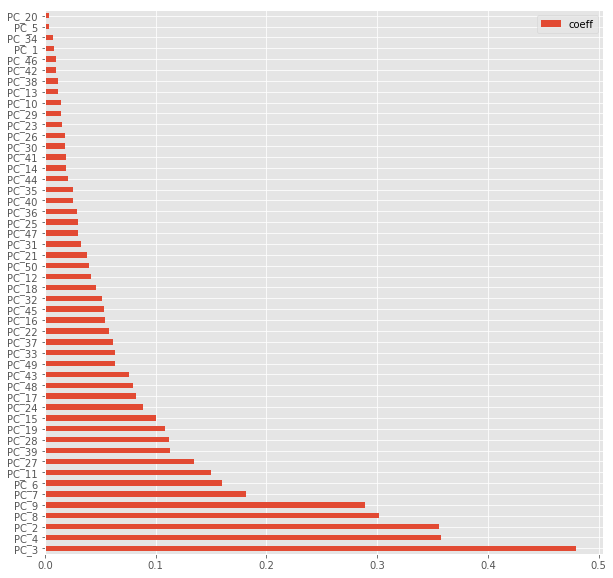

In [35]:
# To be implemented
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PC_%s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names, abs(model_lrc.coef_.flatten())))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['PCs', 'coeff']

ax = df_coeffs.plot.barh(figsize=(10, 10))
t = np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PCs'])
plt.show()

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [36]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
model_rfc = RandomForestClassifier(max_depth=None, n_estimators=20, min_samples_leaf=3, random_state=42)
model_rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [37]:
# Get score for training set
model_rfc.score(X_train_scaled, y_train)

0.94591246903385628

In [38]:
# Get score for test set
model_rfc.score(X_test_scaled, y_test)

0.74494706448508186

#### Use (Stardardized + PCA) tf-idf vectors as features

In [39]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
model_rfc = RandomForestClassifier(max_depth=None, n_estimators=20, min_samples_leaf=3, random_state=42)

model_rfc.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [40]:
# Get score for training set
model_rfc.score(X_train_pca, y_train)

0.98637489677952106

In [41]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_rfc.score(X_test_pca, y_test)

0.72088546679499521

#### Q: What do you see from the training result and the test result?

A: (insert your comments here)

#### You can plot the feature importances against principal components


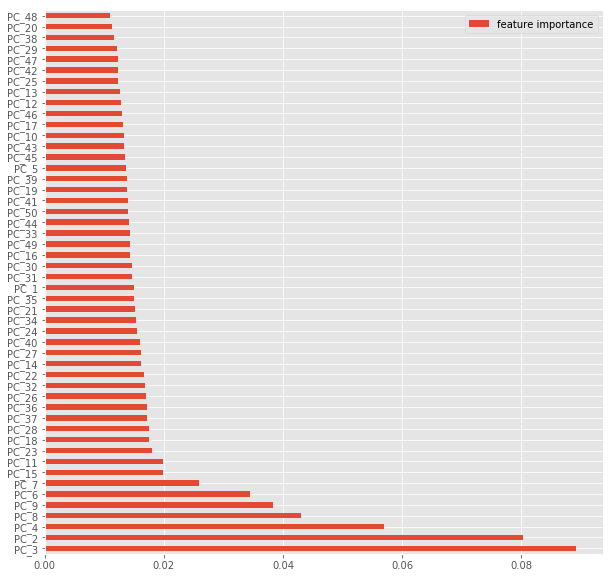

In [42]:
# To be implemented
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PC_%s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names, model_rfc.feature_importances_))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['PCs', 'feature importance']

ax = df_coeffs.plot.barh(figsize=(10, 10))
t = np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PCs'])
plt.show()

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [ ]:
# To be implemented

## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

In [ ]:
# To be implemented

## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

In [ ]:
# To be implemented

## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

In [ ]:
# To be implemented

## Extra Credit #5: Can you think of other use cases that clustering can be used? 
Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.

In [ ]:
# To be implemented